In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
df = pd.read_csv("myspace.csv", header=None, names=["Week", "Accesses"])

In [3]:
# Technically this removes all zeros and not just leading ones. However,
# in this dataset zeros only occure as one continous block in the beginning 
df = df[df.Accesses > 0]
df

,Week,Accesses
27,2004-07-11 - 2004-07-17,1
28,2004-07-18 - 2004-07-24,1
29,2004-07-25 - 2004-07-31,1
30,2004-08-01 - 2004-08-07,1
31,2004-08-08 - 2004-08-14,1
...,...,...
475,2013-02-10 - 2013-02-16,2
476,2013-02-17 - 2013-02-23,2
477,2013-02-24 - 2013-03-02,2
478,2013-03-03 - 2013-03-09,2


In [4]:
h = np.array(df.Accesses, dtype=np.float64)
t = np.arange(1, len(h)+1, dtype=np.float64)

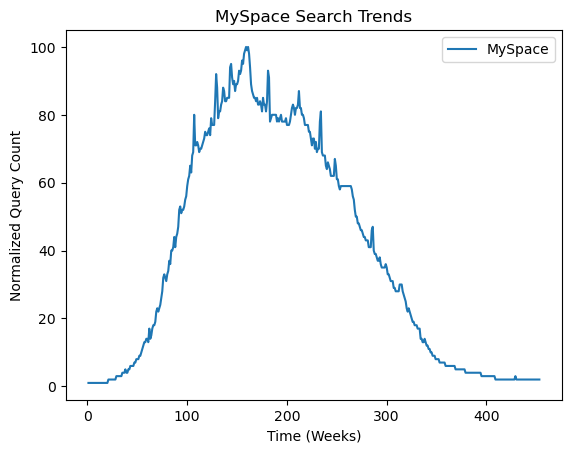

In [5]:
plt.title("MySpace Search Trends")
plt.plot(t, h, label="MySpace")
plt.xlabel("Time (Weeks)")
plt.ylabel("Normalized Query Count")
plt.legend()

In [6]:
def weibull(t, A, α, β):
    αβ, tβ = α / β, t / β
    return A * αβ * tβ**(α - 1) * np.exp(-tβ**α)

### Task 2.3

In [7]:
(A, α, β), _ = opt.curve_fit(weibull, t, h, p0=[1000, 1.0, 1.0])
A, α, β

(17459.397170497832, 2.7309606584085335, 211.0243911614922)

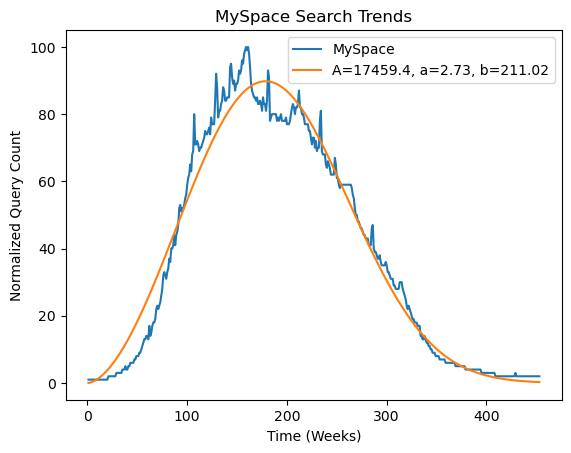

In [8]:
plt.title("MySpace Search Trends")
plt.plot(t, h, label="MySpace")
plt.xlabel("Time (Weeks)")
plt.ylabel("Normalized Query Count")
plt.plot(t, weibull(t, A, α, β), label=f"A={A:.1f}, a={α:.2f}, b={β:.2f}")
plt.legend()
plt.savefig("slides/images/scicurvefit.png")